<a href="https://colab.research.google.com/github/andresenrique08/ML_2020/blob/master/Reto%203/JReto3_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto 3.0

### Curso de Machine Learning 2020-20
Autores:
*    Andrés Enrique Ávila Rojas (201319127)
*   Jeison Alexander Timana Rangel (201617870)

In [1]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.exceptions import ConvergenceWarning


Se toman los datos del repositorio de github con el siguiente link https://raw.githubusercontent.com/andresenrique08/ML_2020/master/Reto%203/msd_genre_dataset.txt

In [2]:
# Reading file from github
url = "https://raw.githubusercontent.com/andresenrique08/ML_2020/master/Reto%203/msd_genre_dataset.txt"
data  = pd.read_csv(url,skiprows=9, sep=",") 
data.head()

,%genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,46.673067,14.613684,14.664215,0.176561,-9.346377,-12.341699,11.183382,7.405288,9.313765,3.201169,-0.152734,5.809709,14.930820,802.205948,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,43.645377,-87.337150,41.051582,7.814770,-12.989848,-14.253599,6.126045,-2.448662,22.691713,-2.872706,1.427725,-6.710730,22.704843,1561.307072,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,37.573538,-61.202030,28.760533,-13.788123,10.062347,-4.872030,-14.090243,5.580175,15.414011,4.556137,-1.877363,20.879475,58.459621,4644.001846,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,42.566615,17.217897,53.484213,1.564362,-8.884632,-13.088890,-9.762620,1.373769,1.092876,1.479490,1.517015,8.562618,22.575460,691.140671,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,40.976507,-13.609779,39.566169,-5.602033,-17.754819,-21.833261,-5.600732,2.291770,3.526177,1.535449,2.763958,3.388757,34.294994,1062.180815,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152


Los géneros unicos son los siguientes:

In [3]:
generos = data['%genre'].unique()
generos = pd.DataFrame(data=generos, columns=['Generos'])
generos

,Generos
0,classic pop and rock
1,punk
2,folk
3,pop
4,dance and electronica
5,metal
6,jazz and blues
7,classical
8,hip-hop
9,soul and reggae


In [4]:
data1 = data.loc[(data['%genre']=='jazz and blues') | (data['%genre']=='soul and reggae')]
data1.head()

,%genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
48942,jazz and blues,TRJBLUX12903CE16EC,John Stevens,Mango,-18.996,89.147,1,0,1,256.86159,34.738162,-50.948828,20.177101,15.139567,-25.836751,7.729854,-23.534951,-7.002408,9.661461,-0.752980,6.760097,17.112598,12.473302,1530.622764,1649.321047,1221.638146,501.717892,1091.743641,618.560018,402.236969,309.392602,233.206167,261.850703,240.834177
48943,jazz and blues,TRDPDLX12903CE16F2,John Stevens,Carnaval,-19.347,125.825,4,2,1,301.87057,34.033346,-39.733083,30.640298,19.646264,-45.231415,9.103613,-19.019581,1.119047,9.169450,3.999394,5.481075,10.958845,11.150600,1385.186042,1670.689893,1339.193474,889.918742,1148.824912,428.976969,306.187624,368.973940,227.275123,261.643570,332.356536
48944,jazz and blues,TRMWVBM128F42374DA,John Stevens,My Blue Heaven (Album Version),-9.472,121.707,4,2,1,158.85016,41.794197,-22.133118,3.518487,1.868059,13.542078,6.944006,15.406498,5.469637,4.822017,1.792601,-10.094489,-2.143374,41.497045,4513.995103,2640.398239,3070.791615,1347.758671,1499.491510,1015.076345,897.411739,608.034880,549.493210,481.149049,442.663136
48945,jazz and blues,TRMLIWL128F42374DE,John Stevens,Here_ There And Everywhere (Album Version),-14.406,83.012,5,0,1,181.26322,38.637530,-64.807191,-21.920418,-25.058971,-2.520459,-11.979187,-4.021518,-4.502840,1.350948,-6.206154,-2.557249,1.841054,26.279428,2304.536939,1187.644248,1311.170435,809.621938,612.699944,492.734025,525.801667,585.984445,278.578591,250.545027,348.842236
48946,jazz and blues,TRGFUVB128F42374E1,John Stevens,This Love (Album Version),-9.289,76.013,4,7,0,248.89424,43.089845,-27.351674,14.205832,-6.941388,21.278516,-9.627968,-6.894824,-2.730303,2.003291,-2.030266,-0.764775,1.769443,37.786419,3726.684916,1164.272074,1536.674490,1167.316436,580.604008,498.168561,607.747214,367.191519,403.532772,262.670577,272.634634


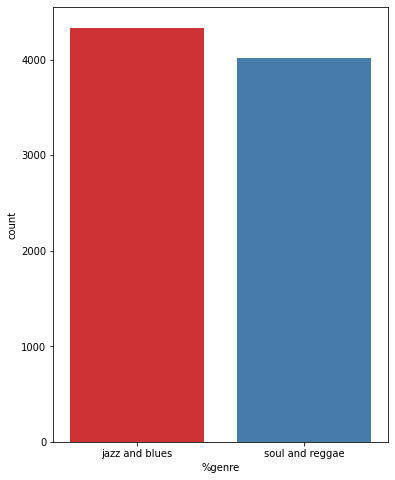

jazz and blues     0.519042
soul and reggae    0.480958
Name: %genre, dtype: float64

In [5]:

f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="%genre", data=data1, palette="Set1")
plt.show()
data1['%genre'].value_counts()/len(data1)

In [6]:
data1['%genre'].replace(['jazz and blues','soul and reggae'],[0,1], inplace=True)
data1 = data1.drop(['track_id', 'artist_name','title'], axis=1)
scaler = MinMaxScaler()
data1 = pd.DataFrame(scaler.fit_transform(data1), columns = data1.columns) 
data1.head()
Y = data1['%genre']
X = data1.drop(['%genre'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)



/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
data1.head()

,%genre,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,0.0,0.540775,0.353277,0.142857,0.000000,1.0,0.088999,0.575350,0.318832,0.442692,0.549958,0.363029,0.385309,0.360767,0.462401,0.669684,0.419899,0.797934,0.666495,0.038407,0.047278,0.076034,0.079438,0.068968,0.128698,0.099308,0.077007,0.097205,0.095678,0.106249,0.086422
1,0.0,0.532164,0.498627,0.571429,0.181818,1.0,0.104668,0.560022,0.337049,0.466187,0.572080,0.281699,0.394378,0.389008,0.527240,0.666231,0.490502,0.778664,0.610157,0.033756,0.041603,0.077229,0.088441,0.135484,0.136040,0.061473,0.052752,0.119388,0.092242,0.106146,0.124834
2,0.0,0.774436,0.482308,0.571429,0.181818,1.0,0.054880,0.728804,0.365637,0.405286,0.484811,0.528162,0.380122,0.604321,0.561974,0.635719,0.457717,0.544002,0.490205,0.140484,0.163703,0.131462,0.221055,0.213932,0.181143,0.178442,0.202052,0.208392,0.278903,0.215859,0.171129
3,0.0,0.653386,0.328965,0.714286,0.000000,1.0,0.062682,0.660153,0.296322,0.348165,0.352631,0.460805,0.255204,0.482811,0.482357,0.611359,0.338884,0.657558,0.526683,0.086964,0.077480,0.050214,0.086295,0.121725,0.067083,0.074197,0.108210,0.200183,0.121962,0.100599,0.131753
4,0.0,0.778925,0.301229,0.571429,0.636364,0.0,0.086226,0.756982,0.357160,0.429284,0.441567,0.560604,0.270725,0.464840,0.496508,0.615937,0.400923,0.684564,0.526027,0.127434,0.132979,0.048907,0.103565,0.183014,0.062955,0.075282,0.128904,0.118724,0.194348,0.106659,0.099769


## **Redes neuronales**
## **1 capa**

In [ ]:
activacion = ['identity', 'logistic', 'tanh', 'relu'] #para probar
tasas_aprendizaje = ['constant', 'invscaling', 'adaptive']
algoritmo = ['lbfgs', 'sgd', 'adam']
n = 302
step = 30
top_5 = []
u=0
for i in range(2, n, step):
  for j in range(0, len(activacion)):
    for k in range(0, len(tasas_aprendizaje)):
      for l in range(0, len(algoritmo)):
        try:
          clf = MLPClassifier(hidden_layer_sizes=(i,),activation=activacion[j], learning_rate=tasas_aprendizaje[k], solver=algoritmo[l])
          with warnings.catch_warnings():
            warnings.filterwarnings("error", category=ConvergenceWarning,
                                    module="sklearn")
            clf.fit(x_train1, y_train1)
            score =clf.score(x_test1, y_test1)
            celda = [score, i, activacion[j], tasas_aprendizaje[k], algoritmo[l]]
            top_5.append(celda)
            mensaje = 'La combinación ' + activacion[j] + ' ' + tasas_aprendizaje[k] + ' ' + algoritmo[l] + ' converge'
          print(mensaje)
        except:
          mensaje = 'La combinación ' + activacion[j] + ' ' + tasas_aprendizaje[k] + ' ' + algoritmo[l] + ' no converge'
          print(mensaje)

     
          



In [8]:
resul1 = pd.DataFrame(data=top_5, columns=['score','N', 'Función de Activación', 'Tasa de aprendizaje', 'Algoritmo'])
resul1 = resul1.sort_values(by=['score'], ascending=False)
resul1

,score,N,Función de Activación,Tasa de aprendizaje,Algoritmo
57,0.832335,92,tanh,invscaling,adam
106,0.830838,182,tanh,adaptive,adam
151,0.830838,272,tanh,constant,adam
73,0.830838,122,tanh,invscaling,adam
86,0.830838,152,logistic,adaptive,adam
...,...,...,...,...,...
72,0.453593,122,tanh,invscaling,sgd
136,0.449102,242,tanh,invscaling,sgd
27,0.425150,32,relu,invscaling,sgd
120,0.400449,212,tanh,invscaling,sgd


## **Tratamiento (comparación Función de activación)**

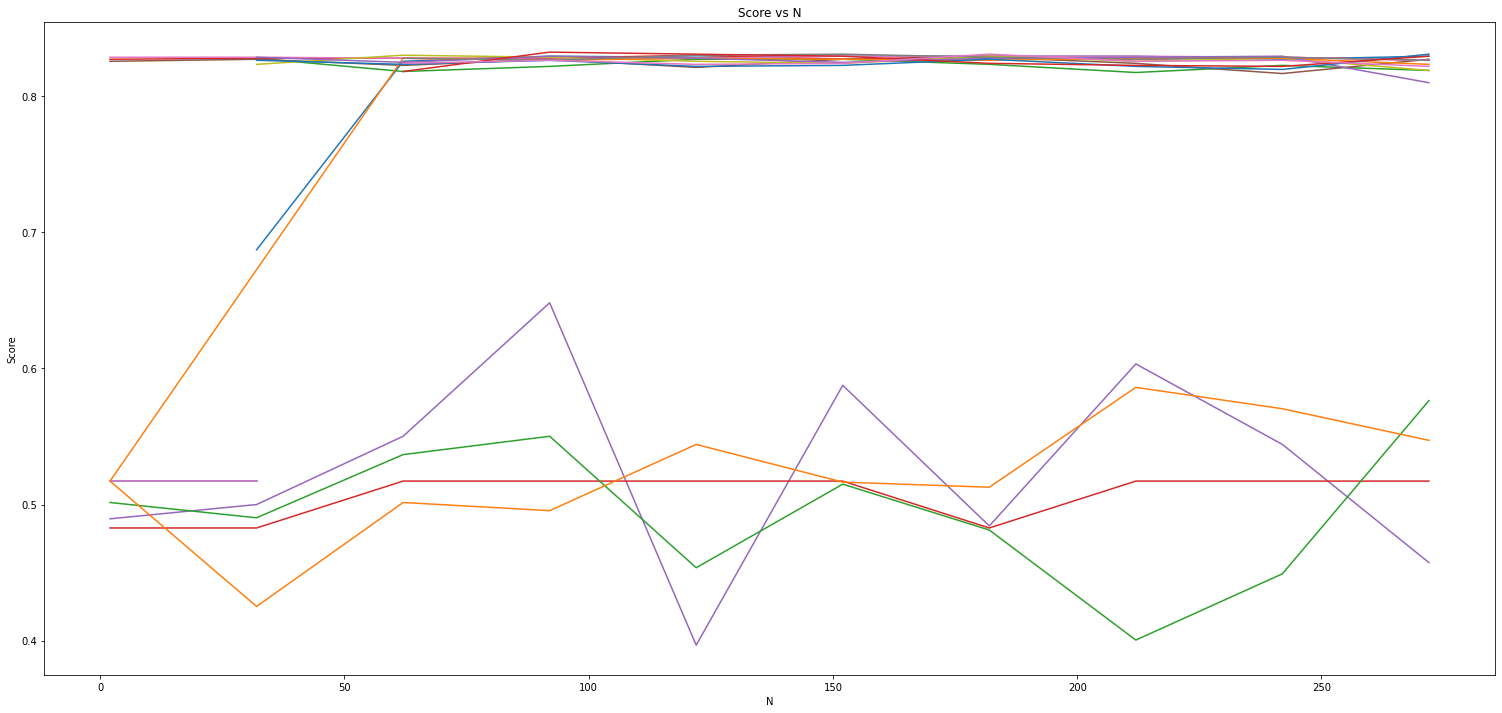

In [9]:
plt.figure(figsize=(26,12))
plt.xlabel('N')
plt.ylabel('Score')
plt.title('Score vs N')


for i in range(0, len(activacion)):
  for j in range(0, len(tasas_aprendizaje)):
    for k in range(0, len(algoritmo)):
      temp_activacion = activacion[i]
      temp_tasas = tasas_aprendizaje[j]
      temp_algoritmo = algoritmo[k]
      temp_data = resul1.loc[(resul1['Función de Activación']==temp_activacion) & (resul1['Tasa de aprendizaje']==temp_tasas) & (resul1['Algoritmo']==temp_algoritmo)]
      temp_data = temp_data.sort_values(by=['N'], ascending=True)
      plt.plot(temp_data['N'].values, temp_data['score'].values)
        

## **2 capas Intento final**

In [10]:



activacion = ['identity', 'logistic', 'tanh', 'relu'] #para probar
tasas_aprendizaje = ['constant', 'invscaling', 'adaptive']
algoritmo = ['lbfgs', 'sgd', 'adam']
n1 = 302
n2 = 152
step1 = 60
step2 = 25
top_capa2 = []

for i in range(2, n1, step1):
  for j in range(2, n2, step2):
    for k in range(0, len(activacion)):
      for l in range(0, len(tasas_aprendizaje)):
        for m in range(0, len(algoritmo)):
          try:
            modelo = MLPClassifier(hidden_layer_sizes=(i,j,),activation=activacion[k], learning_rate=tasas_aprendizaje[l], solver=algoritmo[m])
            with warnings.catch_warnings():
              warnings.filterwarnings("error", category=ConvergenceWarning,
                                    module="sklearn")
              modelo.fit(x_train1, y_train1)
              score =modelo.score(x_test1, y_test1)
              celda = [score, i, j, activacion[k], tasas_aprendizaje[l], algoritmo[m]]
              top_capa2.append(celda)
              mensaje = 'La combinación '+ str(i)+ '-' + str(j) + ' ' + activacion[k] + ' ' + tasas_aprendizaje[l] + ' ' + algoritmo[m] + ' converge'
              print(mensaje)
          except:
            mensaje = 'La combinación '+ str(i)+ '-' + str(j) + ' ' + activacion[k] + ' ' + tasas_aprendizaje[l] + ' ' + algoritmo[m] + ' no converge'
            print(mensaje)


resulcapa2 = pd.DataFrame(data=top_capa2, columns=['score','N1', 'N2', 'Función de Activación', 'Tasa de aprendizaje', 'Algoritmo'])
resulcapa2 = resulcapa2.sort_values(by=['score'], ascending=False)





La combinación 2-2 identity constant lbfgs converge
La combinación 2-2 identity constant sgd no converge
La combinación 2-2 identity constant adam no converge
La combinación 2-2 identity invscaling lbfgs converge
La combinación 2-2 identity invscaling sgd converge
La combinación 2-2 identity invscaling adam converge
La combinación 2-2 identity adaptive lbfgs converge
La combinación 2-2 identity adaptive sgd no converge
La combinación 2-2 identity adaptive adam converge
La combinación 2-2 logistic constant lbfgs no converge
La combinación 2-2 logistic constant sgd converge
La combinación 2-2 logistic constant adam no converge
La combinación 2-2 logistic invscaling lbfgs no converge
La combinación 2-2 logistic invscaling sgd converge
La combinación 2-2 logistic invscaling adam no converge
La combinación 2-2 logistic adaptive lbfgs no converge
La combinación 2-2 logistic adaptive sgd converge
La combinación 2-2 logistic adaptive adam converge
La combinación 2-2 tanh constant lbfgs no conv

In [11]:
resulcapa2

,score,N1,N2,Función de Activación,Tasa de aprendizaje,Algoritmo
544,0.864521,242,127,relu,constant,adam
420,0.859281,182,102,relu,constant,adam
422,0.856287,182,102,relu,adaptive,adam
547,0.853293,242,127,relu,invscaling,adam
490,0.850299,242,52,relu,constant,adam
...,...,...,...,...,...,...
212,0.463323,62,127,identity,invscaling,sgd
488,0.455090,242,52,tanh,invscaling,sgd
383,0.443862,182,52,tanh,invscaling,sgd
257,0.394461,122,27,tanh,invscaling,sgd


## **2 Capas**

In [ ]:
mejor_1capa = resul1.iloc[0].values
N = 300
step = 5
layer2 = []

for i in range(2, N, step):
  modelo = MLPClassifier(hidden_layer_sizes=(mejor_1capa[1],i,),activation=mejor_1capa[2], learning_rate=mejor_1capa[3], solver=mejor_1capa[4]).fit(x_train1, y_train1)
  score = modelo.score(x_test1, y_test1)
  celda = [score, i]
  layer2.append(celda)

In [ ]:
resul2 = pd.DataFrame(data=layer2, columns=['score','N Layer 2'])
resul2 = resul2.sort_values(by=['score'], ascending=False)
resul2.head()

,score,N Layer 2
3,0.860778,17
5,0.858533,27
4,0.857784,22
9,0.849551,47
1,0.848802,7


## **3 Capas**

In [ ]:
mejor_2capa = resul2.iloc[0].values
N = 300
step = 5
layer3 = []

for i in range(2, N, step):
  modelo = MLPClassifier(hidden_layer_sizes=(mejor_1capa[1],int(mejor_2capa[1]),i,),activation=mejor_1capa[2], learning_rate=mejor_1capa[3], solver=mejor_1capa[4]).fit(x_train1, y_train1)
  score = modelo.score(x_test1, y_test1)
  celda = [score, i]
  layer3.append(celda)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [ ]:
resul3 = pd.DataFrame(data=layer3, columns=['score','N Layer 3'])
resul3 = resul3.sort_values(by=['score'], ascending=False)
resul3.head()

,score,N Layer 3
4,0.857036,22
22,0.855539,112
3,0.849551,17
11,0.848054,57
48,0.848054,242


In [ ]:
mejor_3capa = resul3.iloc[0].values
N = 300
step = 5
layer4 = []

for i in range(2, N, step):
  modelo = MLPClassifier(hidden_layer_sizes=(mejor_1capa[1],int(mejor_2capa[1]),int(mejor_3capa[1]),i,),activation=mejor_1capa[2], learning_rate=mejor_1capa[3], solver=mejor_1capa[4]).fit(x_train1, y_train1)
  score = modelo.score(x_test1, y_test1)
  celda = [score, i]
  layer4.append(celda)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

KeyboardInterrupt: ignored

In [ ]:
resul4 = pd.DataFrame(data=layer4, columns=['score','N Layer 4'])
resul4 = resul4.sort_values(by=['score'], ascending=False)
resul4.head()

In [ ]:

            
try:
  modelo = MLPClassifier(hidden_layer_sizes=(212,),activation='relu', learning_rate='invscaling', solver='lbfgs')
  with warnings.catch_warnings():
    warnings.filterwarnings("error", category=ConvergenceWarning,
                                    module="sklearn")
    modelo.fit(x_train1, y_train1)
except:
  print(1)

1
